# Finance Data Project 

This data project we will focus on exploratory data analysis of stock prices. Disclaimer, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

## Get the Data

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [87]:
cf.set_config_file(sharing='public',theme='pearl',offline=True)

## Data
Stock information for the following banks from Jan 1st 2006 to Jan 1st 2016 :
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
#Bank of America
bac = data.DataReader("BAC", 'yahoo',start = '2006-01-01', end = '2016-01-01') 
#CitiGroup
cg = data.DataReader("C", 'yahoo',start = '2006-01-01', end = '2016-01-01') 
# Goldman Sachs
gs = data.DataReader("GSBD", 'yahoo',start = '2006-01-01', end = '2016-01-01') 
#JPMorgan Chase
jpm = data.DataReader("JPM", 'yahoo',start = '2006-01-01', end = '2016-01-01') 
#Morgan Stanley
gsbd = data.DataReader("MS", 'yahoo',start = '2006-01-01', end = '2016-01-01') 
#Wells Fargo
wf = data.DataReader("WFC", 'yahoo',start = '2006-01-01', end = '2016-01-01') 

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
# Alphabetical order of tickets
tickers = sorted(['BAC','C','GSBD','JPM','MS','WFC'])
tickers

['BAC', 'C', 'GSBD', 'JPM', 'MS', 'WFC']

Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [4]:
bank_stocks = pd.concat([bac,cg,gs,jpm,gsbd,wf], axis = 1, keys = tickers)

In [92]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.364243   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.009903   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.052418   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.002811   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.024082   

                     C                                      ...        JPM  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                    MS                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224960  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249123  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345787  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382027  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756561  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104458  
2006-01-04  31.530001  10870000.0  19.871269  
2006-01-05  31.495001  10158000.0  19.849216  
2006-01-06  31.680000   8403800.0  19.965801  
2006-01-09  31.674999   5619600.0  19.962656  

[5 rows x 36 columns]

** Set the column name levels

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# EDA

In [95]:
bank_stocks.xs(level='Stock Info' ,key = 'Close', axis = 1).max()

Bank Ticker
BAC      54.900002
C       564.099976
GS       25.190001
GSBD     70.080002
JPM      89.300003
MS       58.520000
dtype: float64

In [147]:
#Same as the above, second way
for i in tickers:
    print(i,bank_stocks[i]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GSBD 25.190000534057617
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

In [6]:
returns = bank_stocks.xs(level='Stock Info' ,key = 'Close', axis = 1).pct_change()
returns

Bank Ticker,BAC,C,GSBD,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,NaN,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,NaN,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,NaN,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,NaN,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.001511,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.002018,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,-0.022245,0.010395,0.011812,0.011156


In [11]:
returns = pd.DataFrame()

In [12]:
for i in tickers:
    returns[i + 'Return'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSBDReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,NaN,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,NaN,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,NaN,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,NaN,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [7]:
import seaborn as sns

In [13]:
returns

,BACReturn,CReturn,GSBDReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,NaN,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,NaN,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,NaN,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,NaN,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.001511,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.002018,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,-0.022245,0.010395,0.011812,0.011156


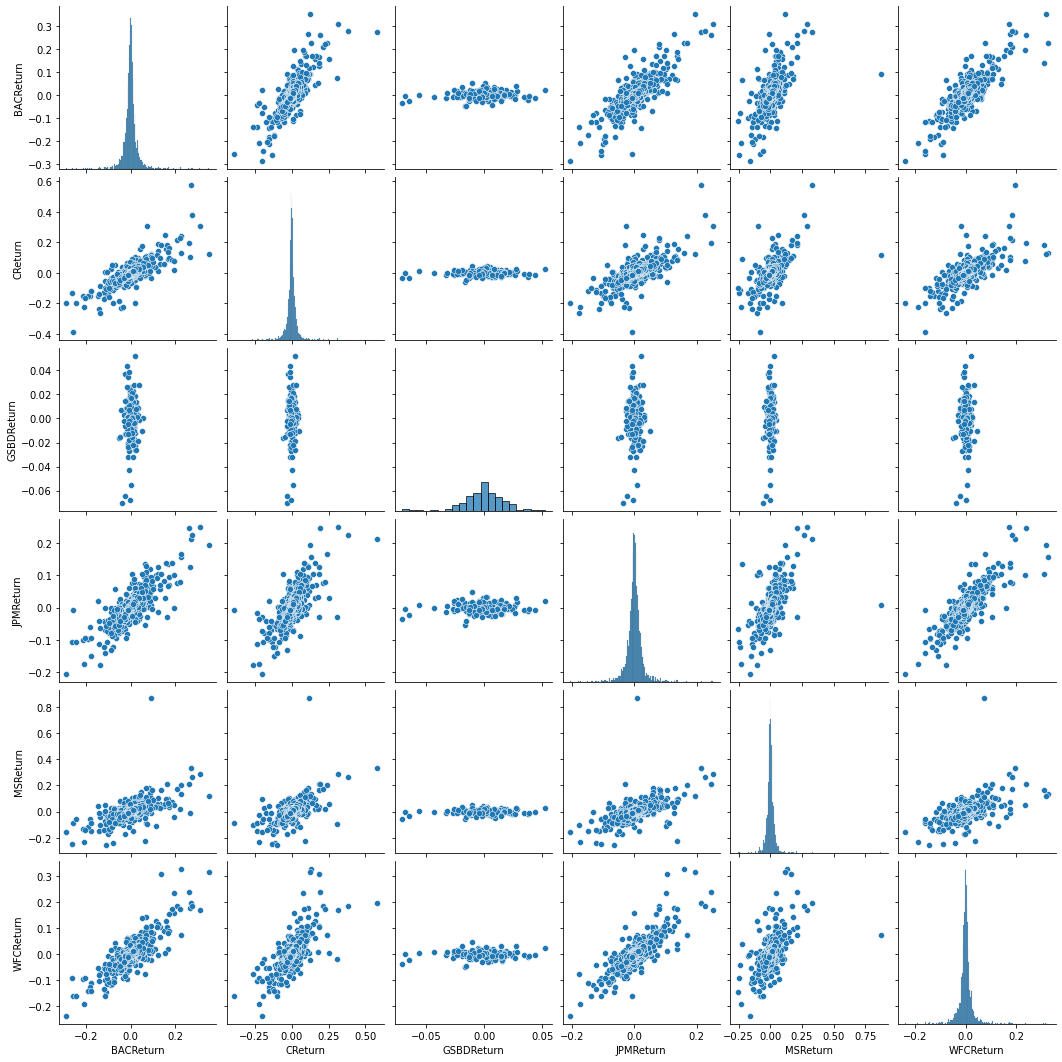

In [16]:
# [1:] is used because the first row of the dataframe in NaN
sns.pairplot(returns[1:])

/Users/BExapo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='CReturn', ylabel='Density'>

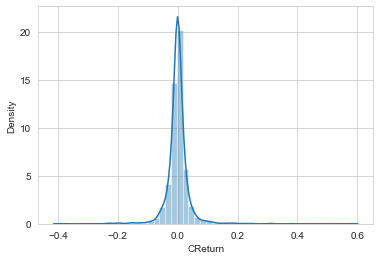

In [148]:
sns.distplot(returns['CReturn'])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [17]:
returns.head()

,BACReturn,CReturn,GSBDReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,NaN,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,NaN,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,NaN,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,NaN,0.016242,0.010586,-0.000158


In [73]:
returns.idxmax()

BACReturn    2009-04-09
CReturn      2008-11-24
GSBDReturn   2015-10-05
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: datetime64[ns]

In [74]:
returns.idxmin()

BACReturn    2009-01-20
CReturn      2009-02-27
GSBDReturn   2015-08-21
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2009-01-20
dtype: datetime64[ns]

** Noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **
Historically, indeed there was a significant distruption in the market around that time frame

** Assess the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [150]:
returns.std()

BACReturn     0.036647
CReturn       0.038672
GSBDReturn    0.017177
JPMReturn     0.027667
MSReturn      0.037819
WFCReturn     0.030238
dtype: float64

In [33]:
returns.loc['2015-01-01':'2015-12-31']['GSBDReturn']

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2015-12-24   -0.001511
2015-12-28   -0.002018
2015-12-29   -0.022245
2015-12-30   -0.004654
2015-12-31   -0.012987
Name: GSBDReturn, Length: 252, dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

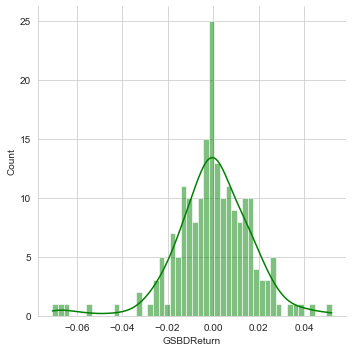

In [153]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['GSBDReturn'],color = 'green', kde= True, bins =50)

** Distplot of the 2008 returns for CitiGroup **

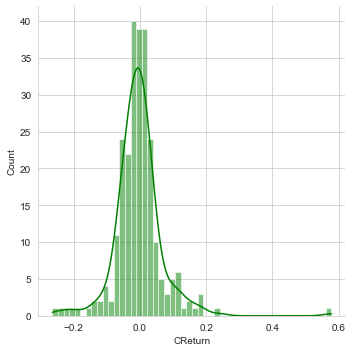

In [157]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color = 'green', kde= True, bins = 50)

____
# More Visualization

### Imports

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [16]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364227  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052425  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002823  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024067  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224953  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249138  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345783  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382023  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756554  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104462  
2006-01-04   31.799999  31.530001  10870000.0  19.871265  
2006-01-05   31.500000  31.495001  10158000.0  19.849205  
2006-01-06   31.580000  31.680000   8403800.0  19.965807  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

In [17]:
close_prices = bank_stocks.xs(level='Stock Info', key="Close", axis=1)

In [89]:
close_prices.iplot(y=tickers,
               width=2.0,
               xTitle="Date", yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")

In [161]:
#Second way, same as above
from turtle import title
bank_stocks.xs(level='Stock Info', key="Close", axis=1).iplot(width=2.0, xTitle='Date',yTitle='Close Prices',title='Historical Close Prices')

## Moving Averages

Analysis of the moving averages for these stocks in the year 2008. 

**Folling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Note: I created a dataframe, then i created a column where inserted all the closing prices for the year of 2008, and then i created an other column named MA "Moving Average". At the end i plotted both The closing price and MA

In [68]:
bac_08 = pd.DataFrame()

In [72]:
bac_08['Close']= pd.DataFrame(close_prices.loc['2008-01-01':'2008-12-31']['BAC'])
bac_08.head()
bac_08['MA'] = bac_08['Close'] .rolling(window = 30).mean() #BAC: Bank of America ma: Moving Average
bac_08.head()

,Close,MA
Date,,
2008-01-02,40.560001,NaN
2008-01-03,40.299999,NaN
2008-01-04,39.849998,NaN
2008-01-07,39.900002,NaN
2008-01-08,38.410000,NaN


In [90]:
bac_08.iplot(y = ['Close','MA'],  width=2.0,xTitle="Date", yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")

** Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

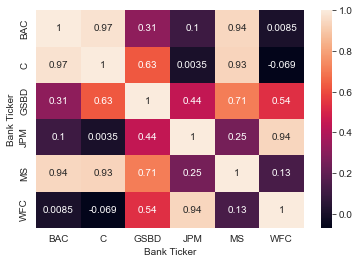

In [81]:
sns.heatmap(bank_stocks.xs(level='Stock Info', key = 'Close', axis=1).corr(), annot=True)

In [165]:
#Cuffling and Plotly Heatmap
heatmap = bank_stocks.xs(level='Stock Info', key = 'Close', axis=1).corr() 
heatmap.iplot(kind ='heatmap', xTitle="Date",colorscale='rdylbu', yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")

**Clustermap to cluster the correlations together:**

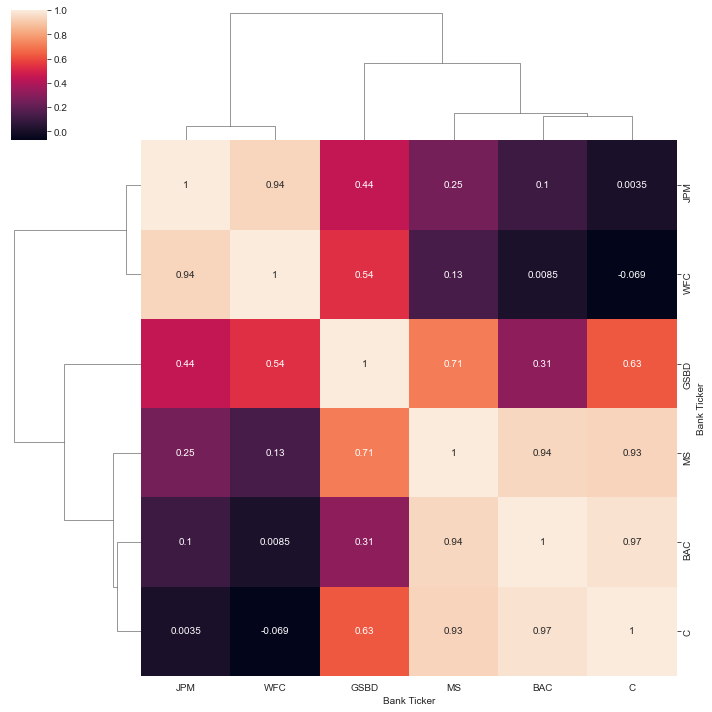

In [83]:
sns.clustermap(bank_stocks.xs(level='Stock Info', key = 'Close', axis=1).corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

In [111]:
bac_15 = pd.DataFrame()

In [124]:
#Bank of America: Close and Open prices for 2015
bac_15['Open'] = bank_stocks.loc['2015-01-01':'2015-12-31'].xs(level = 'Stock Info', key = 'Open', axis = 1)['BAC']
bac_15['Close'] = bank_stocks.loc['2015-01-01':'2015-12-31'].xs(level = 'Stock Info', key = 'Close', axis = 1)['BAC']
bac_15['high'] = bank_stocks.loc['2015-01-01':'2015-12-31'].xs(level = 'Stock Info', key = 'High', axis = 1)['BAC']
bac_15['low'] = bank_stocks.loc['2015-01-01':'2015-12-31'].xs(level = 'Stock Info', key = 'Low', axis = 1)['BAC']

bac_15.head()

,Open,Close,high,low
Date,,,,
2015-01-02,17.990000,17.900000,18.030001,17.680000
2015-01-05,17.790001,17.379999,17.809999,17.290001
2015-01-06,17.420000,16.860001,17.440001,16.780001
2015-01-07,17.139999,16.940001,17.180000,16.870001
2015-01-08,17.160000,17.290001,17.340000,17.100000


In [168]:
bac_15.iplot(kind = 'candle',theme = 'solar')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [126]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364227  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009903  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052425  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002823  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024067  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224953  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249138  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345783  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382023  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756554  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104462  
2006-01-04   31.799999  31.530001  10870000.0  19.871265  
2006-01-05   31.500000  31.495001  10158000.0  19.849205  
2006-01-06   31.580000  31.680000   8403800.0  19.965807  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

In [128]:
ms_15 = pd.DataFrame()

In [129]:
ms_15['Close'] = bank_stocks.loc['2015-01-01':'2015-12-31'].xs(level = 'Stock Info', key = 'Close', axis = 1)['MS']
ms_15.head()

,Close
Date,
2015-01-02,38.709999
2015-01-05,37.500000
2015-01-06,36.419998
2015-01-07,36.939999
2015-01-08,37.490002


In [170]:
ms_15.ta_plot(study='sma',periods=[13,21,55],theme = 'solar')

In [172]:
ms_15.ta_plot(study='rsi',periods=14,theme = 'solar')

In [173]:
bac_15['Close'].ta_plot(study='rsi',periods=14,theme = 'solar')